In [1]:
library(MASS)

In [2]:
data <- read.table('6.txt', header = FALSE)

In [3]:
data

V1,V2,V3,V4,V5,V6,V7
2.154,13.055,4.041,1.908,2.173,1.908,108.216
1.169,13.184,4.150,1.907,1.194,1.907,101.426
1.827,2.469,0.952,1.727,1.862,1.727,56.312
2.055,13.344,4.159,1.705,2.021,2.092,109.639
1.457,14.938,4.653,1.983,1.434,2.407,115.290
2.456,14.918,4.624,1.871,2.472,2.216,119.880
2.175,15.340,4.805,0.674,2.179,0.674,112.241
2.731,8.535,2.803,1.919,2.733,2.336,96.952
1.965,9.660,2.992,1.968,1.962,1.968,94.920
1.914,4.328,1.462,1.748,1.907,2.203,76.833


In [4]:
n <- length(data$V1)

In [5]:
train_data <- data[1:(n-1), 1:ncol(data)]
test_data <- data[n, 1:ncol(data)]

Построим робастную и обычную модель и сравним результаты.

In [6]:
simple_model <- lm(formula = V7 ~ V1 + V2 + V3 + V4 + V5 + V6, data = train_data)
robust_model_1 <- rlm(formula = V7 ~ V1 + V2 + V3 + V4 + V5 + V6, data = train_data, psi = psi.huber)
robust_model_2 <- rlm(formula = V7 ~ V1 + V2 + V3 + V4 + V5 + V6, data = train_data, psi = psi.hampel)
robust_model_3 <- rlm(formula = V7 ~ V1 + V2 + V3 + V4 + V5 + V6, data = train_data, psi = psi.bisquare)

In [7]:
simple_predictions <- predict(simple_model, test_data[1, 1:(ncol(data) - 1)])
robust_predictions_1 <- predict(robust_model_1, test_data[1, 1:(ncol(data) - 1)])
robust_predictions_2 <- predict(robust_model_2, test_data[1, 1:(ncol(data) - 1)])
robust_predictions_3 <- predict(robust_model_3, test_data[1, 1:(ncol(data) - 1)])

In [8]:
simple_predictions

401 
210.8206

In [9]:
robust_predictions_1

401 
114.1631

In [10]:
robust_predictions_2

401 
114.2643

In [11]:
robust_predictions_3

401 
114.1579

In [12]:
test_data$V7

[1] 112.716

Видим, что робастные модели гораздо лучше справились с задачей. У них точность хорошая, когда как у стандартной модели ответ не адекватный. Построим график откликов, чтобы проверить, если ли выбросы.

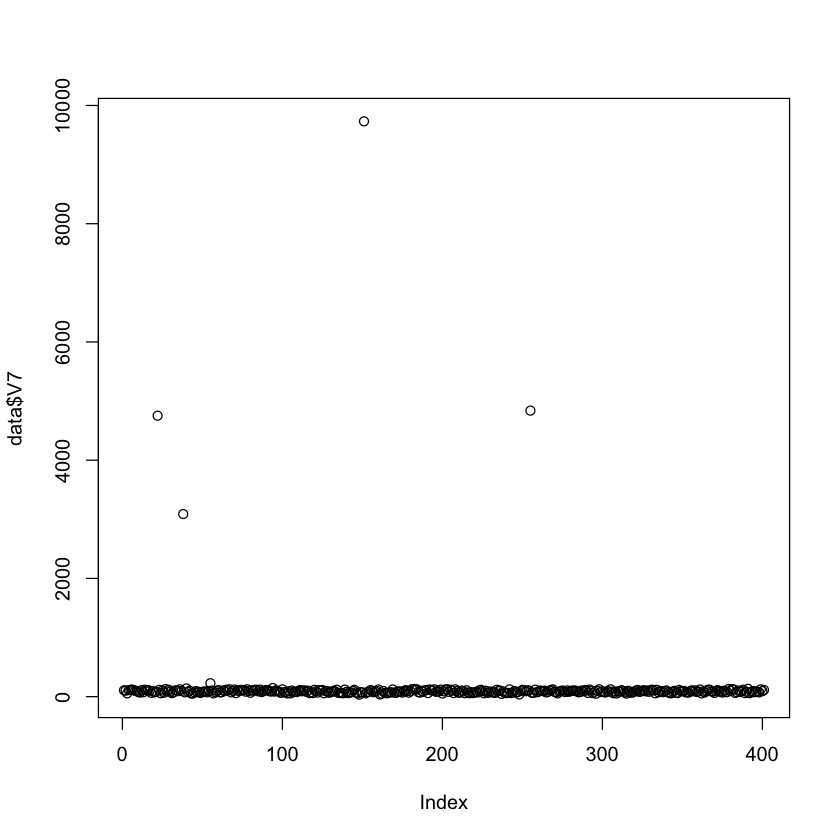

In [13]:
plot(data$V7)

Выбросы действительно есть. Для визуализиуии разделим выборку на 2 части. По первой обучим модель, а по второй построим графики остатков обычной и робастной модели.

In [14]:
data_1 = data[1:200, 1:ncol(data)]
data_2 = data[201:401, 1:ncol(data)]

In [15]:
model_1 <- lm(formula = V7 ~ V1 + V2 + V3 + V4 + V5 + V6, data = data_1)
model_2 <- rlm(formula = V7 ~ V1 + V2 + V3 + V4 + V5 + V6, data = data_1)

In [16]:
predictions_1 = predict(model_1, data_2[,1:(ncol(data)-1)])
predictions_2 = predict(model_2, data_2[,1:(ncol(data)-1)])

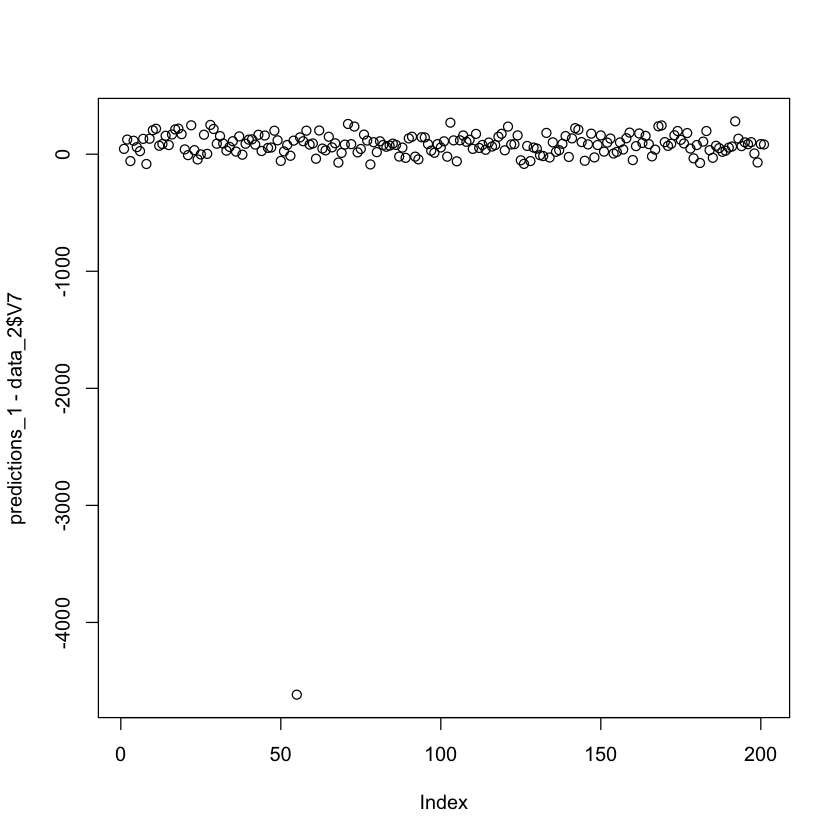

In [17]:
plot(predictions_1 - data_2$V7)

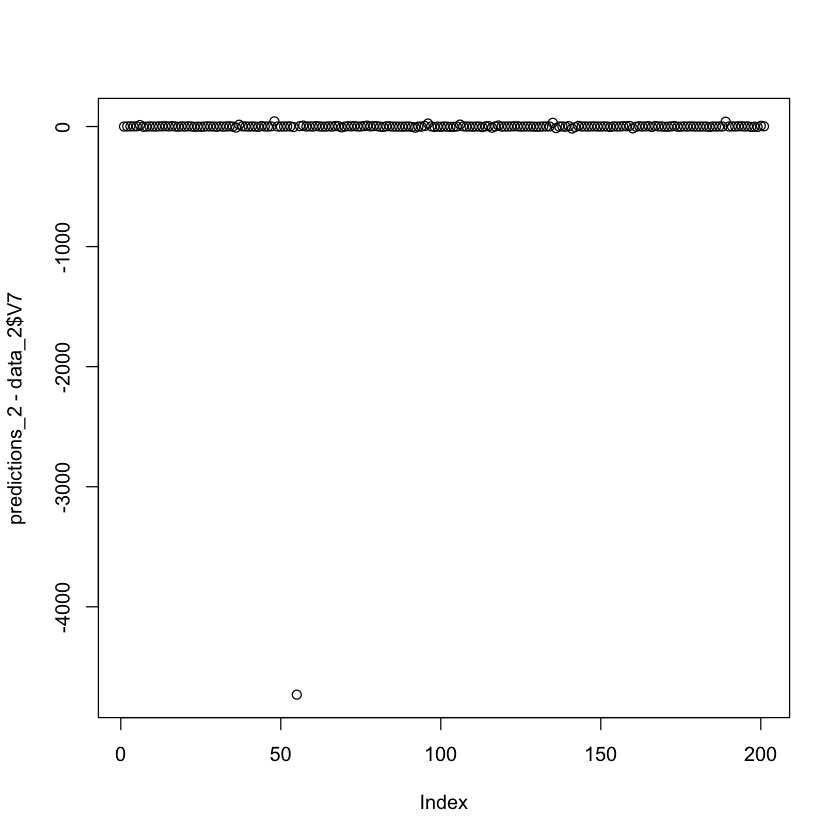

In [18]:
plot(predictions_2 - data_2$V7)

Действительно, в данных есть выброс, с которым робастные модели справились намного лучше обычной.